<a href="https://colab.research.google.com/github/PhamAnhKiet20146220/AI-T7-tiet_1234/blob/main/Tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [14]:
model = Sequential()
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', input_shape = (300,400,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 300, 400, 128)     3584      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 300, 400, 128)     0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 200, 128)    0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 200, 32)      36896     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 150, 200, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 100, 32)      0         
 2D)                                                  

In [15]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [16]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/Tomato train', target_size = (300,400), batch_size = 32, class_mode ='categorical')

Found 406 images belonging to 3 classes.


In [17]:
training_set.class_indices

{'chuachin': 0, 'dachin': 1, 'khong': 2}

In [18]:
train = model.fit(training_set, epochs = 20, batch_size = 10, verbose = 1)

Epoch 1/20
13/13 [==============================] - 55s 4s/step - loss: 1.1435 - accuracy: 0.6429
Epoch 2/20
13/13 [==============================] - 13s 1s/step - loss: 0.4195 - accuracy: 0.8990
Epoch 3/20
13/13 [==============================] - 13s 1s/step - loss: 0.0733 - accuracy: 0.9606
Epoch 4/20
13/13 [==============================] - 13s 980ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 5/20
13/13 [==============================] - 13s 958ms/step - loss: 7.3111e-04 - accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 13s 1s/step - loss: 2.4748e-04 - accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 13s 1s/step - loss: 5.3301e-05 - accuracy: 1.0000
Epoch 8/20
13/13 [==============================] - 13s 1s/step - loss: 9.6666e-05 - accuracy: 1.0000
Epoch 9/20
13/13 [==============================] - 13s 1s/step - loss: 3.3649e-05 - accuracy: 1.0000
Epoch 10/20
13/13 [==============================] - 13s 997ms/step - loss: 4.4479e-05 - acc

In [19]:
Score = model.evaluate(training_set, verbose = 0)
print('Ham mat mat', Score[0])
print('Do chinh xac', Score[1])

Ham mat mat 6.196265076141572e-06
Do chinh xac 1.0


In [20]:
model.save('TomatoDetection.h5')
model_CNN = load_model('TomatoDetection.h5')

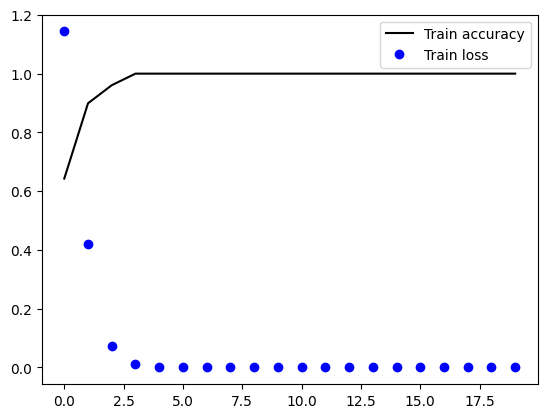

In [21]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'bo', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

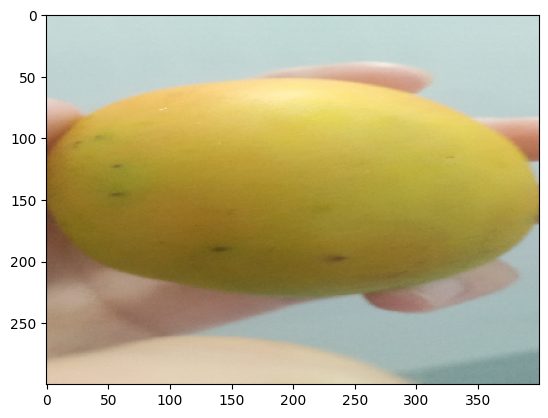

1/1 [==============================] - 0s 75ms/step
Cà chua chưa chín


In [22]:
filename = "/content/drive/MyDrive/cà chua test.jpg"
img = load_img(filename,target_size = (300,400))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,300,400,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Cà chua chưa chín")
if(kq == 1):
    print("Cà chua đã chín")
if(kq == 2):
    print("không có cà chua")    

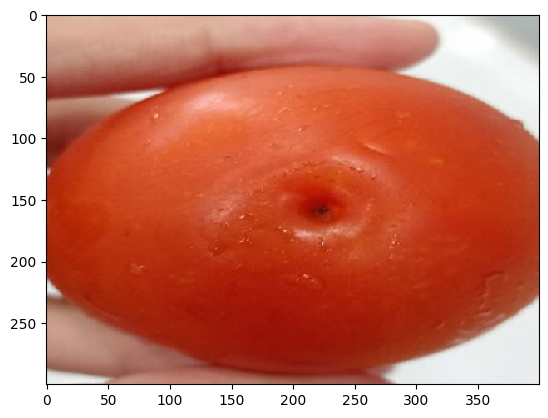

1/1 [==============================] - 0s 20ms/step
Cà chua đã chín


In [24]:
filename = "/content/drive/MyDrive/ảnh cà chua chín.jpg"
img = load_img(filename,target_size = (300,400))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,300,400,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Cà chua chưa chín")
if(kq == 1):
    print("Cà chua đã chín")
if(kq == 2):
    print("không có cà chua")    